In [31]:
import numpy as np
import pandas as pd

data = pd.read_csv("india-food-prices.csv")
data.head()
x=data["date"]
y=data["price"]
data.describe()


/var/folders/8y/g9dn_v3953j0q8tjpk2n5jgc0000gn/T/ipykernel_11606/3663292594.py:4: DtypeWarning: Columns (4,5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("india-food-prices.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
count,133138,132349,132349,133138,132349,132349,133138,133138,133138,133138,133138,133138,133138
unique,332,32,150,157,210,206,7,24,4,2,2,23995,2874
top,2021-06-15,Uttar Pradesh,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Rice,KG,actual,INR,16.0,0.27
freq,2941,9661,4112,4112,2920,2920,33234,10573,123716,133137,133137,1393,1241


In [32]:
data.drop(['latitude','longitude','admin1','admin2','category','commodity','unit','usdprice','currency','pricetype'],axis=1,inplace=True)
#data.drop([],axis=1)


In [46]:
data.drop(['usdprice'],axis=1)

,date,market,commodity,price
0,#date,#loc+market+name,#item+name,#value
1,1994-01-15,Delhi,Rice,8.0
2,1994-01-15,Delhi,Wheat,5.0
3,1994-01-15,Delhi,Sugar,13.5
4,1994-01-15,Delhi,Oil (mustard),31.0
...,...,...,...,...
133133,2021-07-15,Kharagpur,Lentils (masur),104.37
133134,2021-07-15,Kharagpur,Lentils (moong),115.0
133135,2021-07-15,Kharagpur,Lentils (urad),105.0
133136,2021-07-15,Kharagpur,Onions,30.0


In [47]:
#drop rows
data=data.iloc[1:]

In [48]:
data.head()



,date,market,commodity,price,usdprice
1,1994-01-15,Delhi,Rice,8.0,0.25
2,1994-01-15,Delhi,Wheat,5.0,0.16
3,1994-01-15,Delhi,Sugar,13.5,0.43
4,1994-01-15,Delhi,Oil (mustard),31.0,0.99
5,1994-01-15,Ahmedabad,Rice,6.8,0.22


In [49]:
data.describe()

,date,market,commodity,price,usdprice
count,133137,133137,133137,133137,133137
unique,331,156,23,23994,2873
top,2021-06-15,Mumbai,Rice,16.0,0.27
freq,2941,4112,10573,1393,1241


In [50]:
data.isnull().sum()

date         0
market       0
commodity    0
price        0
usdprice     0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133137 entries, 1 to 133137
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       133137 non-null  object
 1   market     133137 non-null  object
 2   commodity  133137 non-null  object
 3   price      133137 non-null  object
 4   usdprice   133137 non-null  object
dtypes: object(5)
memory usage: 5.1+ MB


In [52]:
data

,date,market,commodity,price,usdprice
1,1994-01-15,Delhi,Rice,8.0,0.25
2,1994-01-15,Delhi,Wheat,5.0,0.16
3,1994-01-15,Delhi,Sugar,13.5,0.43
4,1994-01-15,Delhi,Oil (mustard),31.0,0.99
5,1994-01-15,Ahmedabad,Rice,6.8,0.22
...,...,...,...,...,...
133133,2021-07-15,Kharagpur,Lentils (masur),104.37,1.4
133134,2021-07-15,Kharagpur,Lentils (moong),115.0,1.54
133135,2021-07-15,Kharagpur,Lentils (urad),105.0,1.41
133136,2021-07-15,Kharagpur,Onions,30.0,0.4


In [54]:
df = pd.DataFrame()
df[['DD','MM','YYYY']] = data['date'].str.split('-',expand=True)
df['price']=data['price']

In [56]:
df.dtypes

DD       object
MM       object
YYYY     object
price    object
dtype: object

In [57]:
df['price']= pd.to_numeric(df['price'])
df['MM']= pd.to_numeric(df['MM'])
df['YYYY']= pd.to_numeric(df['YYYY'])
df['DD']= pd.to_numeric(df['DD'])

In [59]:
#dfsplit['ut']=dfsplit['DD']*10000000+dfsplit['MM']*100+dfsplit['YYYY']
df.dtypes

DD         int64
MM         int64
YYYY       int64
price    float64
dtype: object

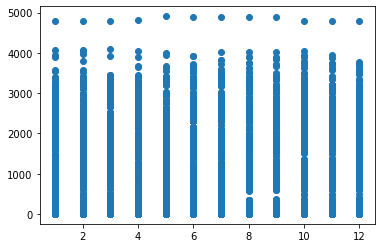

In [61]:
import matplotlib.pyplot as plt
x = df.MM
y = df.price

plt.scatter(x,y)
plt.show()